In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
% matplotlib inline
plt.style.use('seaborn-whitegrid')
import sklearn

In [ ]:
file = '/content/drive/My Drive/Bigdata Project/train.csv'
train = pd.read_csv(file,nrows = 5000000)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# with open (filename) as readfile:
#   df = pd.read_csv(readfile.read()) 

In [ ]:
file2 = '/content/drive/My Drive/Bigdata Project/test.csv'
test = pd.read_csv(file2)

In [ ]:
print(train.shape, test.shape)

(5000000, 8) (9914, 7)


In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [ ]:
train = train[((train['pickup_longitude'] > -78) & (train['pickup_longitude'] < -70)) & ((train['dropoff_longitude'] > -78) & (train['dropoff_longitude'] < -70)) & ((train['pickup_latitude'] > 37) & (train['pickup_latitude'] < 45)) & ((train['dropoff_latitude'] > 37) & (train['dropoff_latitude'] < 45)) & (train['passenger_count'] > 0) & (train['fare_amount'] >= 2.5)]

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.878498e+06,4.878498e+06,4.878498e+06,4.878498e+06,4.878498e+06,4.878498e+06
mean,1.133320e+01,-7.397526e+01,4.075092e+01,-7.397438e+01,4.075129e+01,1.690462e+00
std,9.726934e+00,4.324984e-02,3.374851e-02,4.194516e-02,3.676409e-02,1.313952e+00
min,2.500000e+00,-7.790248e+01,3.703126e+01,-7.797089e+01,3.703126e+01,1.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073654e+01,-7.399158e+01,4.073558e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075385e+01,1.000000e+00
75%,1.250000e+01,-7.396833e+01,4.076754e+01,-7.396535e+01,4.076840e+01,2.000000e+00
max,9.520000e+02,-7.000039e+01,4.473220e+01,-7.000227e+01,4.472755e+01,2.080000e+02


In [ ]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
test = test[((test['pickup_longitude'] > -78) & (test['pickup_longitude'] < -70)) & ((test['dropoff_longitude'] > -78) & (test['dropoff_longitude'] < -70)) & ((test['pickup_latitude'] > 37) & (test['pickup_latitude'] < 45)) & ((test['dropoff_latitude'] > 37) & (test['dropoff_latitude'] < 45)) & (test['passenger_count'] > 0)] 

In [ ]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
print(train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
print(test.isnull().sum())

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
train = train.dropna(how = 'any', axis = 'rows')

In [ ]:
print(train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


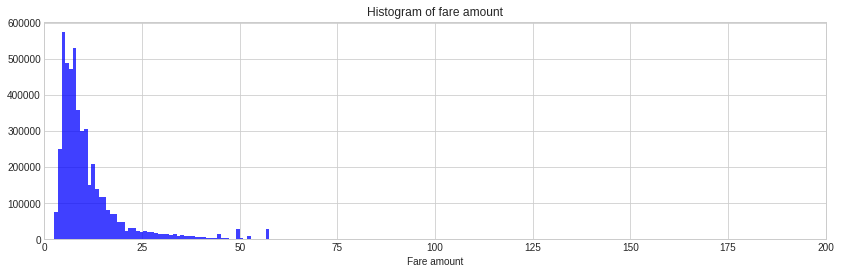

In [ ]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(train.fare_amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0, 200)
plt.show();

In [ ]:
train.groupby('fare_amount').size().nlargest(10)

fare_amount
6.5     237317
4.5     200433
8.5     183203
5.7     142304
5.3     142293
6.1     138084
4.9     138049
6.9     127239
10.5    124046
7.3     119606
dtype: int64

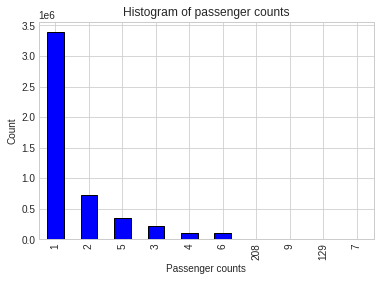

In [ ]:
train['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Histogram of passenger counts'); plt.xlabel('Passenger counts'); plt.ylabel('Count');

In [ ]:
train.groupby('passenger_count').size()

passenger_count
1      3386066
2       723885
3       214918
4       103907
5       346169
6       103547
7            1
9            2
129          1
208          2
dtype: int64

In [ ]:
train = train.loc[train['passenger_count'] <= 6]

In [ ]:
train.groupby('passenger_count').size()

passenger_count
1    3386066
2     723885
3     214918
4     103907
5     346169
6     103547
dtype: int64

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.878492e+06,4.878492e+06,4.878492e+06,4.878492e+06,4.878492e+06,4.878492e+06
mean,1.133318e+01,-7.397526e+01,4.075092e+01,-7.397438e+01,4.075129e+01,1.690347e+00
std,9.726842e+00,4.324985e-02,3.374853e-02,4.194506e-02,3.676411e-02,1.306014e+00
min,2.500000e+00,-7.790248e+01,3.703126e+01,-7.797089e+01,3.703126e+01,1.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073654e+01,-7.399158e+01,4.073558e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075385e+01,1.000000e+00
75%,1.250000e+01,-7.396833e+01,4.076754e+01,-7.396535e+01,4.076840e+01,2.000000e+00
max,9.520000e+02,-7.000039e+01,4.473220e+01,-7.000227e+01,4.472755e+01,6.000000e+00


In [ ]:
train['pickup_datetime'].head(1)

0    2009-06-15 17:26:21 UTC
Name: pickup_datetime, dtype: object

In [ ]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'], infer_datetime_format=True)

In [ ]:
train['pickup_datetime'].head(1)

0   2009-06-15 17:26:21+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [ ]:
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day of Week'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

Text(0.5, 1.0, 'Distribution of Fare')

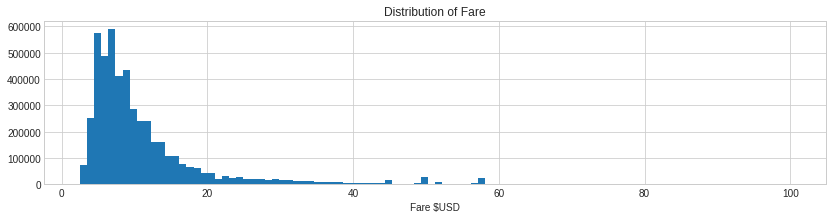

In [ ]:
train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fare $USD')
plt.title('Distribution of Fare')

In [ ]:
def distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c=2*np.arcsin(np.sqrt(a))
    km=6367*c
    miles=0.6213712*km
    return miles

train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

In [ ]:
# def distance(lat1, lon1, lat2, lon2):
#     p = 0.017453292519943295 # Pi/180
#     a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
#     return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
#                                       train.dropoff_latitude, train.dropoff_longitude)

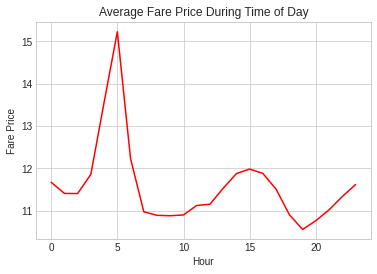

In [ ]:
time_of_day = train.groupby(['Hour']).mean()

plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')

plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Average Fare Price During Time of Day')
plt.show()

Text(0, 0.5, 'Frequency')

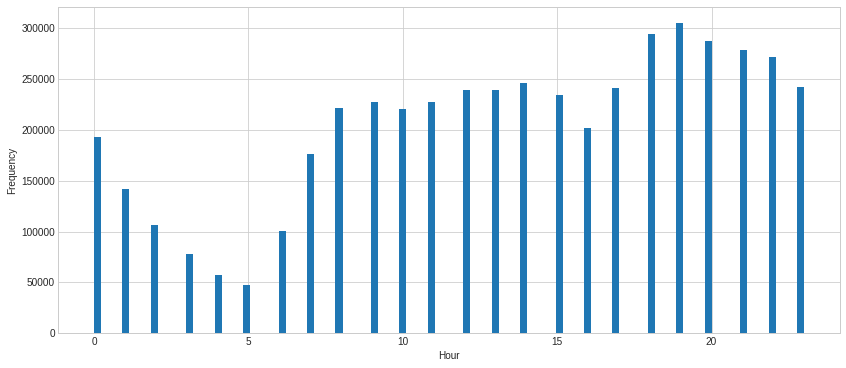

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

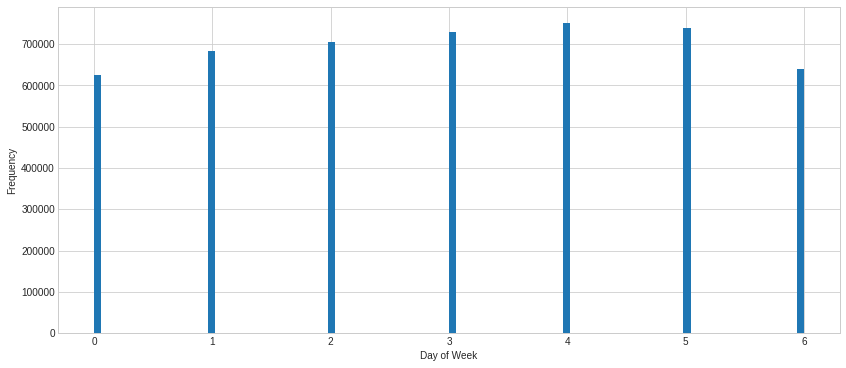

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

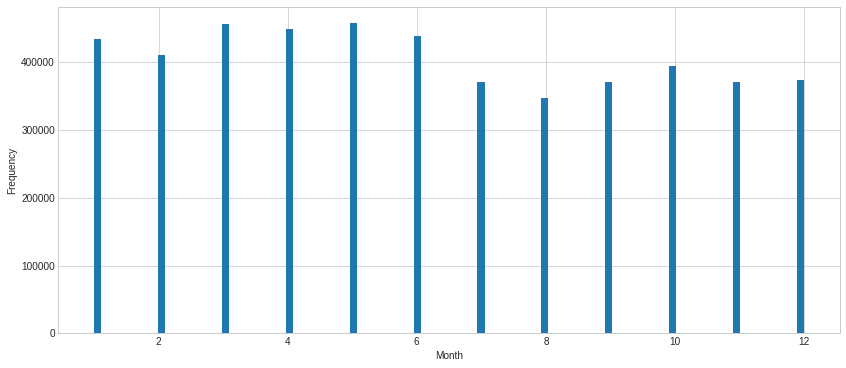

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(train['Month'], bins=100)
plt.xlabel('Month')
plt.ylabel('Frequency')

In [ ]:
labels = np.array(train['fare_amount'])
train1 = train.drop('fare_amount', axis = 1)
train1 = train1.drop('pickup_datetime', axis = 1)
train1 = train1.drop('key', axis = 1)
attributes_list = list(train1.columns)
train_rf = np.array(train1)

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(train1, labels, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [ ]:
LR.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
LRpredictions = LR.predict(test_features)
LRerrors = abs(LRpredictions - test_labels)
print('Mean Absolute Error:', "$",round(np.mean(LRerrors), 2))

Mean Absolute Error: $ 2.88


In [ ]:
LRmape = 100 * (LRerrors / test_labels)
LRaccuracy = 100 - np.mean(LRmape)
print('Accuracy:', round(LRaccuracy, 2), '%.')

Accuracy: 69.61 %.


Gadient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gradient= GradientBoostingRegressor(n_estimators=100, learning_rate=1, max_depth=3, random_state=0)
gradientBoost = model_gradient.fit(train_features, train_labels)

In [ ]:
predicted = model_gradient.predict(test_features)

In [ ]:
pip install metrics

     |████████████████████████████████| 849kB 5.6MB/s 
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17815 sha256=936d1abd891962f2171483dac33c3dc10c15b5abf14f7d99d4f8aa8ebef71e9e
  Stored in directory: /root/.cache/pip/wheels/38/e8/55/c4c648451a33a60920318eba4c5735088dbf78dc20d4277db0
  Created wheel for pathspec: filename=pathspec-0.5.5-cp36-none-any.whl size=24229 sha256=417dd961a54021474d1e44f3c8a61d7735b8cd8e735989d3ee471a618177b199
  Stored in directory: /root/.cache/pip/wheels/d1/2e/6b/c67842adf3b13ea33ca3fe6a2a963622821ad647db724688e2
Successfully built metrics pathspec
ERROR: jupyterlab-pygments 0.1.2 has requirement pygments<3,>=2.4.1, but you'll have pygments 2.2.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1


In [ ]:
from sklearn.metrics import mean_squared_error

grmse = np.sqrt(sklearn.metrics.mean_squared_error(predicted, test_labels))
grmse

3.968822894039586

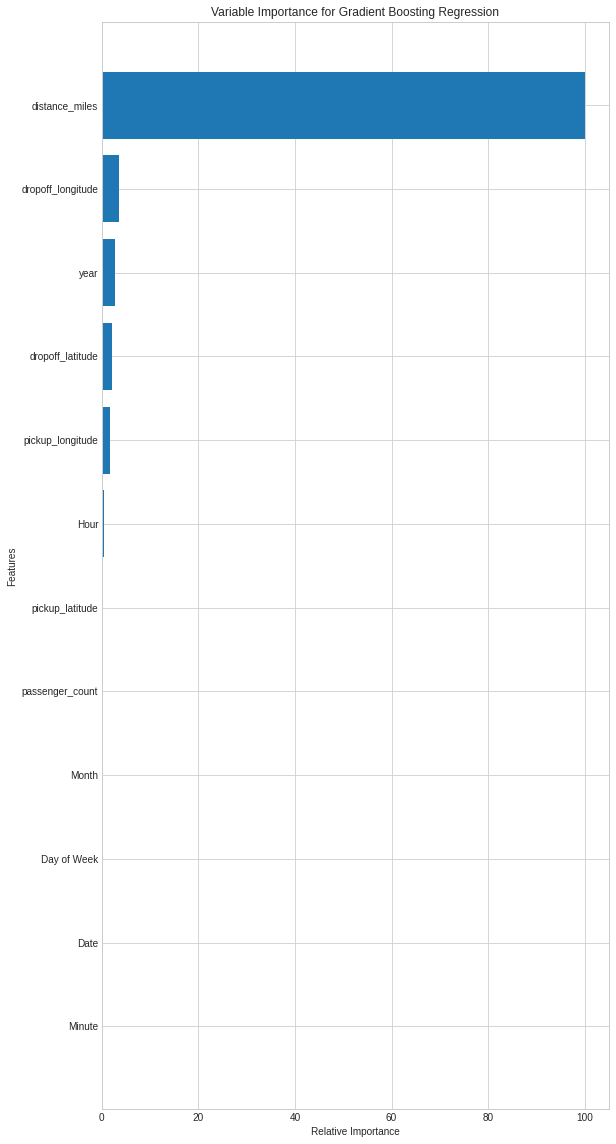

In [ ]:
feature_importance = gradientBoost.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_features.columns[sorted_idx]) 
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Variable Importance for Gradient Boosting Regression')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rf.fit(train_features, train_labels)
randomForestPredict = rf.predict(test_features)

from sklearn.metrics import mean_squared_error

rfrmse = (mean_squared_error(test_labels, randomForestPredict) ** 0.5)
rfrmse 

5.489997642980543

A Baseline Regression Model with Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
seed = 7
np.random.seed(seed)
# Keras regressor model
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, train_features, train_labels, cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Results: -39.40 (20.23) MSE


In [ ]:
print("RMSE:", np.sqrt(results.std()))

RMSE: 4.4976095151697715
